# Assignment Eight

### Due Wednesday April 17th

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Problem 1**: 10 pts - For the function

$$
f(x) = \frac{8x}{x^{2} + 4}, ~ -1 \leq x \leq 1
$$

a) (2pts) Using an equispaced set of $6$ nodes, generate the Lagrange interpolating polynomial to $f(x)$.  Generate a plot which shows how the error in your approximation varies over the interval.  

b) (2pts) Using an equispaced set of $18$ nodes, generate the Lagrange interpolating polynomial to $f(x)$.  Generate a plot which shows how the error in your approximation varies over the interval.  

c) (2pts) At what number of equispaced nodes does your Lagrange interpolation approximation break down?  

In [2]:
#1a. 
def lfun(xvals,jj,x):
    lval = np.ones(x.size)
    # Insert code here
    n = xvals.size
    for l in xrange(0,n):
        if l != jj:
            lval *= (x-xvals[l])/float(xvals[jj]-xvals[l])  

    return lval

In [3]:
#1a. - Continued
def lagran_interp(xvals,fvals,x):
    n = fvals.size
    # Insert code here 
    ipoly = np.zeros(x.size)
    for jj in xrange(0,n):
        ipoly += fvals[jj]*lfun(xvals,jj,x)
   
    return ipoly

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


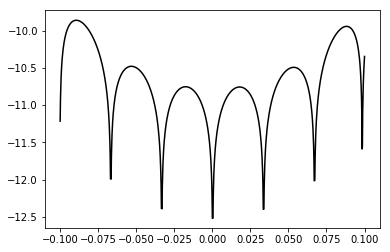

In [4]:
#1a. - Continued
xinterp = np.linspace(-.1,.1,int(1e3))
ftrue = 8*xinterp/(4.+xinterp**2.)
xvals = xinterp[::167] #6 Nodes --> 1000 data-points / 6 nodes = 166.67 data-points per node --> [::166] or [::167] 
fvals = ftrue[::167]
finterp = lagran_interp(xvals,fvals,xinterp)
plt.plot(xinterp,np.log10(np.abs(ftrue-finterp)),ls='-',color='k')

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


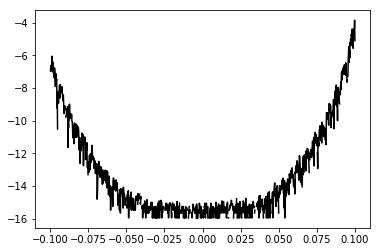

In [5]:
#1b.
xinterp = np.linspace(-.1,.1,int(1e3))
ftrue = 1./(1.+xinterp**2.)
xvals = xinterp[::25] #18 Nodes --> 1000 data-points / 18 nodes = 55.55 data-points per node --> [::55] or [::56] 
fvals = ftrue[::25]
finterp = lagran_interp(xvals,fvals,xinterp)
plt.plot(xinterp,np.log10(np.abs(ftrue-finterp)),ls='-',color='k')

In [6]:
#1c. - Explanation
# It seems that the program starts breaking down when we try using 18 nodes. 

**Problem 2**: 10 pts - Here is a cubic polynomial with three closely spaced real roots:

$$
p(x) = 580x^4 - 2320x^3 -1160x^2 + 6960x -1740
$$

* What are the exact roots of p?
* Plot $p(x)$ for $-2\leq x \leq 4$.  And plot the location of the four roots on the graph.  
* Starting with $x_{0}=2$, what does Newton's method do?
* Starting with $x_{0}=0.3$ and $x_{1}=0.9$, what does the secant method do?
* Starting with the interval $[0.5,2.9]$, what does bisection do?

In [7]:
#2a. - Exact Roots

#SCROLL DOWN TO 2e TO SEE THE EXACT ROOTS!

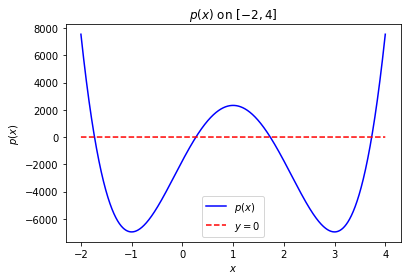

In [8]:
#2b. 
xvals = np.linspace(-2., 4., int(1e5)+1)
pvals = 580*(xvals**4) - 2320*(xvals**3) - 1160*(xvals**2) + 6960*xvals - 1740
zvals = np.zeros(xvals.size)

plt.plot(xvals, pvals, ls = '-', color = 'b', label = '$p(x)$')
plt.plot(xvals, zvals, ls = '--', color = 'r', label = '$y = 0$')
plt.title('$p(x)$ on $[-2, 4]$')
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.legend()

In [9]:
#2c - Newton's Method

f = lambda x: 580*(x**4.) - 2320*(x**3.) - 1160*(x**2.) + 6960*x  - 1740
fp = lambda x: 2320*(x**3.) - 6960*(x**2.) - 2320*x + 6960

def Newtons_method(f,fp,x0,tol):
    x1 = x0 - f(x0)/fp(x0)
    
    while np.abs(x1-x0):
        x0 = x1
        x1 = x0 - f(x0)/fp(x0)
        
    print "A root of f(x) is: %1.15f" %x1

Newtons_method(f,fp,2.,1e-8) # x_{0} = 2

A root of f(x) is: 1.732050807568877


In [10]:
#2d- Secant Method
def secant_method_mod(f,x0,x1,tol):
    f0 = f(x0)
    f1 = f(x1)
    x2 = x1 - f1*(x1-x0)/(f1-f0)
    
    while np.abs(f1) >= tol:
        x0 = x1
        x1 = x2
        f0 = f1
        f1 = f(x1)
        x2 = x1 - f1*(x1-x0)/(f1-f0)
    print "A root of f(x) is: %1.15f" %x2
    
secant_method_mod(f,.3,.9,1e-16) # 𝑥_{0} = 0.3 and 𝑥_{1} = 0.9

A root of f(x) is: 0.267949192431123


In [11]:
#2e - Bisection Method
def bisec_method(a,b,f,tol):
    fa,fb = f(a),f(b)
    
    if fa*fb<0:
        c = (a+b)/2.
        capproxs = np.array([c])
        fc = f(c)
        while np.abs(fc)>=tol:
            if fa*fc<0:
                b = c
            else:
                a = c
          
            c = (a+b)/2.
            capproxs = np.append(capproxs,c)
            fc = f(c)
     
        print "Our root is: %1.15f" %c
    else:
        print "Cannot ensure existence of root."

bisec_method(.5,2.9,f,1e-13) # Interval = [0.5,2.9] 

#Exact Roots (Question 2a.)
bisec_method(-2, -1, f, 1e-13) # Interval = [-2, -1]
bisec_method(-1, 1, f, 1e-13)  # Interval = [-1 , 1] 
bisec_method(1, 3, f, 1e-13)   # Interval = [1, 3] 
bisec_method(3, 4, f, 1e-11)   # Interval = [3, 4] 

Our root is: 1.732050807568877
Our root is: -1.732050807568877
Our root is: 0.267949192431123
Our root is: 1.732050807568878
Our root is: 3.732050807568877


**Problem 3** (10 pts): In class, we used the following program to convert an positive integer to a binary number

In [12]:
def bin_exp(d):
    bstr = ''
    
    while d > 0: 
        b0 = d%2
        d = (d-b0)/2
        if b0 == 0:
            bstr += '0'
        else:
            bstr += '1'
        
    return bstr[::-1]

We also used the following program to convert a decimal number $d$ where $0<d<1$ to binary.

In [13]:
def bin_exp_dec(d):
    bstr=''
    cnt = 0
    while cnt <= 53:
        d *= 2.
        if d >= 1.:
            b1 = 1.
            bstr += '1'
        else:
            b1 = 0.
            bstr += '0'
        d -= b1    
        cnt += 1
        
    return bstr   

a) By modifying the two codes above, create a program that can convert any  positive real number to binary.

b) Test your program by converting the positive real number $12.875$ to binary

In [14]:
#3a.
def real_num_to_binary(d):
    return bin_exp(d) + str(".") + bin_exp_dec(d)

In [15]:
#3b. 
print real_num_to_binary(12.875)

1101.111111111111111111111111111111111111111111111111111111


**Problem 4**: 10 pts - Find seven positive values of $x$ such that $0.04x^2 = 20\sin(x)$.  Explain your choice of root finding method for doing this, and explain how you are certain that you have found seven positive values.  

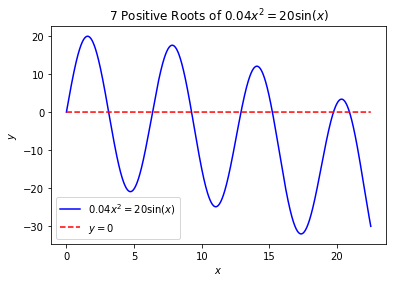

In [16]:
#4. 
f = lambda x: 20*np.sin(x) - .04*(x**2) # 0 = 20sin(x) - .04x^2
xvals = np.linspace(0, 22.5, int(1e5)+1)
yvals = f(xvals)
zvals = np.zeros(xvals.size)
plt.plot(xvals, yvals, ls = '-', color = 'b', label = '$0.04x^{2} = 20\sin(x)$')
plt.plot(xvals, zvals, ls = '--', color = 'r', label = '$y = 0$')
plt.title('7 Positive Roots of $0.04x^{2} = 20\sin(x)$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()

In [17]:
#4. - Continued
bisec_method(2, 4, f, 1e-13)
bisec_method(5, 7, f, 1e-13)
bisec_method(7, 10, f, 1e-13)
bisec_method(10, 15, f, 1e-13)
bisec_method(15, 17.5, f, 1e-13)
bisec_method(17.5, 20, f, 1e-13)
bisec_method(20, 22, f, 1e-13)

# I am certian that these are the correct 7 positive roots because I plotted the graph where it would produce 7
# positive roots and I also plotted y = 0 and determined where the roots are by comparing my results down below to
# graph above.I also used a graphing calculator to check that I have the correct roots.

Our root is: 3.122096446084370
Our root is: 6.364282349840124
Our root is: 9.252704963828734
Our root is: 12.905991025213694
Our root is: 15.225849561222606
Our root is: 19.743615904072822
Our root is: 20.924353678144840
